In [1]:
!pip install graphviz

In [1]:
import json
from graphviz import Digraph
from IPython.display import display

In [72]:
state_styles = {
    "Dormant": {"color": "#A3C1DA", "icon": "./icons/dormant.png"},            
    "Ancient Awakening": {"color": "#F9E6A3", "icon": "./icons/awakening.png"},  
    "Heart Test": {"color": "#F5B3C1", "icon": "./icons/test.png"},      
    "Wisdom Trial": {"color": "#B2E0B2", "icon": "./icons/wisdom_trial.png"},  
    "Revelation of the Wind Gem": {"color": "#A3C1DA", "icon": "./icons/wind_gem.png"},  
    "Return to Sleep": {"color": "#F9E6A3", "icon": "./icons/return_to_sleep.png"}  
}

def visualize_state_machine(data):
    dot = Digraph(comment=data["character"])

    # Aggiunge i nodi per ciascuno stato, con icone PNG e colori
    for state in data["states"]:
        name = state["name"]
        description = state["description"]
        
        # Prende colore e icona dallo stile definito
        style = state_styles.get(name, {"color": "#D3D3D3", "icon": None})
        color = style["color"]
        icon = style["icon"]

        # Crea un nodo con icona PNG e colore
        label = f'<<table border="0" cellborder="0" cellspacing="0"><tr><td align="center"><img src="{icon}" width="24" height="24"/></td></tr><tr><td align="center"><b>{name}</b><br/>{description}</td></tr></table>>'
        
        dot.node(
            name,
            label=label,
            shape='rect',  # Nodo di tipo rettangolo
            style="filled",
            fillcolor=color,
            fontsize='10',
            fontcolor='black'
        )

    # Aggiunge le transizioni con le condizioni
    for state in data["states"]:
        name = state["name"]
        for transition in state["transitions"]:
            condition = transition["condition"]
            next_state = transition["next_state"]

            if next_state == "Return to Sleep":
                dot.edge(name, next_state, label=condition, fontsize='8')
            else:
                dot.edge(name, next_state, label=condition, fontsize='8')

    # Visualizza il grafo
    display(dot)


in label of node Dormant
in label of node Ancient Awakening
in label of node Heart Test
in label of node Wisdom Trial
in label of node Revelation of the Wind Gem
in label of node Return to Sleep


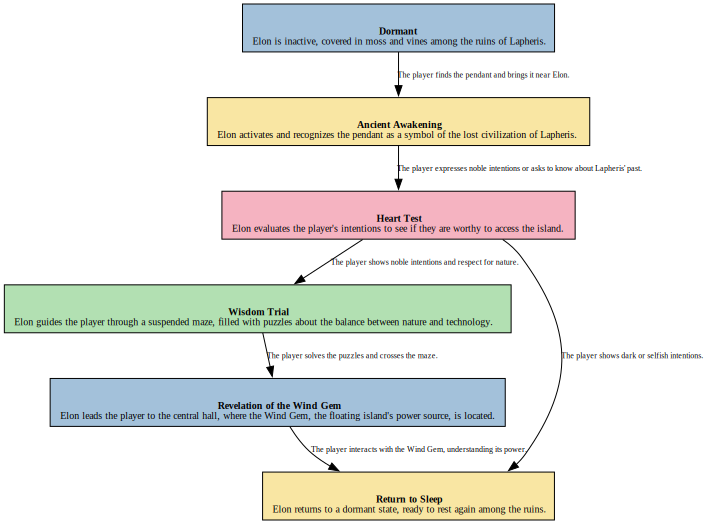

In [73]:

# Function to load DFA from a JSON file
def load_dfa_from_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# Function to simulate DFA


# Load DFA from the file
data = load_dfa_from_file('elon_states.json')
# Visualize the DFA
visualize_state_machine(data)